<h1><center>Airbnb Analysis of the US</center></h1> 


<h4 align="left">Authors : Japneet Singh, Aviral Choudhary  </h4> 



## Introduction 

People opnions might vary on the matter of them liking to travel around. Some like to travel at every oppurtunity, some like to travel occasionally, whereas others might not like to travel at all. Regardless, the one thing that they might all agree on is that travelling can get real expensive real fast. The cost of transportation, gas, food, tours, travel kits etc. However, one factor that is really influential is the amount of money you are spending on lodging. The amount you spend on lodging determines how much you can spend on every other thing like the food you can eat or explore, the places you can visit, the experience you can be part of and basically the memories you might make.

Airbnb offers excellent choices for short to even long term lodging options for travellers. It's cheaper than hotels and you have the added touch of interacting with a local to know about the place. However, as Airbnb has taken of so has the number of options available and this might really confuse the consumer. 

## Outline

    Getting Started
        1.1 Required Libraries and APK
        1.2 Scrape the website
        1.3 Tidy up the scrapped data
        1.4 Map and Viz of Airbnb in US (Exploratory Analysis)
        
    Story of New Jersey
        2.1 In which city are bnbs located (Map and Viz)
        2.2 Which cities in New Jersey have highest reviews
        2.3 Desirable cities to Airbnb
        2.4 Superhosts in US and New Jersey 
        2.5 Shows what kind of rooms are available in New Jersey
        2.6 Price distribution of bnbs in NJ
        
    Machine Learning
        5.1 Multiple Linear Regression 
        5.2 P-value with statsmodels
        5.3 Updated Model with Key Features 
    
    Conclusions


## Getting Started

### Required Libraries and APK

<ul>

<li>pandas and numpy </li> for handling and modeling data 
<li>matplotlib.pyplot and seaborn </li> plotting and making graphs 
<li>pandasql</li> query the database
<li>IPython.display</li> displaying the map
<li>mapboxg</li> using mapbox to make awesome maps
<li>sklearn and statsmodels </li> machine learning and finding key features

A more comprehensive list of the enviorment use is available at <a href="https://github.com/320final/320final.github.io/blob/master/requirements.txt">Requirments.txt</a> 


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from mapboxgl.utils import *
from mapboxgl.viz import *
import pandasql
from IPython.display import IFrame
import os
import json
from sklearn import model_selection

ModuleNotFoundError: No module named 'mapboxgl'

### Scrape && Tidy it up

We made a python scrapper (written below) to get the sample data from the Airbnb website. We then left it runing over night via a server that we hosted locally, gathering 33,000 data points or Airbnb listing from across the country on which we would later run the analysis. 

Gathering data from a website like airbnb can be a little challenging since its restrictions on scrawlers running over the website. This could result in a lot of 429 errors and also 403 errors. Also figuring out how to get the data from the webiste from the webiste was tricky since we couldn't just target the html elements because then that would have invloved a lot of bots running automated html clicks and a scraper scraping certain parts. The work  around for that was to tcapture the network and look for the file that was providing data to the airbnb website. After soring through all the files on the network we were able to find the one that was needed. 

The next step was to search the website for all 50 sates in the US. The tricky part with airbnb is that it uses a special encoding for each of its states in the url and hence we had look for that specific id and generate that for every state so that we can tamper with the url based on our needs. After this was done we just had to make sure we were switching sessions to make it seem that we aren't on their website for too long. 

Bingo! We were able to scrape 20 pages for each state. 


In [27]:
from bs4 import BeautifulSoup as bs
import requests
import urllib
import json
import time
import collections
import pprint
import csv

states = {
    'Alabama': 'ChIJdf5LHzR_hogR6czIUzU0VV4',
    'Alaska': 'ChIJG8CuwJzfAFQRNduKqSde27w',
    'Arizona': 'ChIJaxhMy-sIK4cRcc3Bf7EnOUI',
    'Arkansas': 'ChIJYSc_dD-e0ocR0NLf_z5pBaQ',
    'California': 'ChIJPV4oX_65j4ARVW8IJ6IJUYs',
    'Colorado': 'ChIJt1YYm3QUQIcR_6eQSTGDVMc',
    'Connecticut': 'ChIJpVER8hFT5okR5XBhBVttmq4',
    'Delaware': 'ChIJO9YMTXYFx4kReOgEjBItHZQ',
    'Florida': 'ChIJvypWkWV2wYgR0E7HW9MTLvc',
    'Georgia': 'ChIJV4FfHcU28YgR5xBP7BC8hGY',
    'Idaho': 'ChIJ6Znkhaj_WFMRWIf3FQUwa9A',
    'Illinois': 'ChIJGSZubzgtC4gRVlkRZFCCFX8',
    'Indiana': 'ChIJHRv42bxQa4gRcuwyy84vEH4',
    'Iowa': 'ChIJGWD48W9e7ocR2VnHV0pj78Y',
    'Kansas': 'ChIJawF8cXEXo4cRXwk-S6m0wmg',
    'Kentucky': 'ChIJyVMZi0xzQogR_N_MxU5vH3c',
    'Louisiana': 'ChIJZYIRslSkIIYRA0flgTL3Vck',
    'Maine': 'ChIJ1YpTHd4dsEwR0KggZ2_MedY',
    'Maryland': 'ChIJ35Dx6etNtokRsfZVdmU3r_I',
    'Massachusetts': 'ChIJ_b9z6W1l44kRHA2DVTbQxkU',
    'Michigan': 'ChIJEQTKxz2qTE0Rs8liellI3Zc',
    'Minnesota': 'ChIJmwt4YJpbWE0RD6L-EJvJogI',
    'Mississippi': 'ChIJGdRK5OQyKIYR2qbc6X8XDWI',
    'Missouri': 'ChIJfeMiSNXmwIcRcr1mBFnEW7U',
    'Montana': 'ChIJ04p7LZwrQVMRGGwqz1jWcfU',
    'Nebraska': 'ChIJ7fwMtciNk4cRxArzDwyQJ6E',
    'Nevada': 'ChIJcbTe-KEKmYARs5X8qooDR88',
    'New Hampshire': 'ChIJ66bAnUtEs0wR64CmJa8CyNc',
    'New Jersey': 'ChIJn0AAnpX7wIkRjW0_-Ad70iw',
    'New Mexico': 'ChIJqVKY50NQGIcRup41Yxpuv0Y',
    'New York': 'ChIJqaUj8fBLzEwRZ5UY3sHGz90',
    'North Carolina': 'ChIJgRo4_MQfVIgRGa4i6fUwP60',
    'North Dakota': 'ChIJY-nYVxKD11IRyc9egzmahA0',
    'Ohio': 'ChIJwY5NtXrpNogRFtmfnDlkzeU',
    'Oklahoma': 'ChIJnU-ssRE5rIcRSOoKQDPPHF0',
    'Oregon': 'ChIJVWqfm3xuk1QRdrgLettlTH0',
    'Pennsylvania': 'ChIJieUyHiaALYgRPbQiUEchRsI',
    'Rhode Island': 'ChIJD9cOYhQ15IkR5wbB57wYTh4',
    'South Carolina': 'ChIJ49ExeWml-IgRnhcF9TKh_7k',
    'South Dakota': 'ChIJpTjphS1DfYcRt6SGMSnW8Ac',
    'Tennessee': 'ChIJA8-XniNLYYgRVpGBpcEgPgM',
    'Texas': 'ChIJSTKCCzZwQIYRPN4IGI8c6xY',
    'Utah': 'ChIJzfkTj8drTIcRP0bXbKVK370',
    'Vermont': 'ChIJ_87aSGzctEwRtGtUNnSJTSY',
    'Virginia': 'ChIJzbK8vXDWTIgRlaZGt0lBTsA',
    'Washington': 'ChIJ-bDD5__lhVQRuvNfbGh4QpQ'
}

data_dict = []

for state in states:
    id = states[state]
    state = state.replace(" ", "%20")
    print(state)
    url = "https://www.airbnb.com/api/v2/explore_tabs?_format=for_explore_search_web&auto_ib=false&client_session_id=7a1719fb-5452-4be6-8040-45e57eddd9c8&currency=USD&current_tab_id=home_tab&experiences_per_grid=20&fetch_filters=true&guidebooks_per_grid=20&has_zero_guest_treatment=true&hide_dates_and_guests_filters=false&is_guided_search=true&is_new_cards_experiment=true&is_standard_search=true&items_per_grid=18&key=d306zoyjsyarp7ifhu67rjxn52tv0t20&locale=en&metadata_only=false&query={}%2C%20United%20States&query_understanding_enabled=true&refinement_paths%5B%5D=%2Fhomes&satori_version=1.1.14&screen_height=969&screen_size=medium&screen_width=1114&selected_tab_id=home_tab&show_groupings=true&supports_for_you_v3=true&timezone_offset=-360&version=1.6.5".format(state)

    for i in range(0,20):
        if i == 0:
            response = requests.get(url)
            print(response)
            page = urllib.request.urlopen(url)
            print(page)
            soup = bs(page, "html.parser")
            print(soup)

            output = "0{}page.json".format(state)
            with open(output, 'wb') as f:
                f.write(str(soup).encode())
            
        else:
            response = requests.get("https://www.airbnb.com/api/v2/explore_tabs?_format=for_explore_search_web&auto_ib=false&client_session_id=7a1719fb-5452-4be6-8040-45e57eddd9c8&currency=USD&current_tab_id=home_tab&experiences_per_grid=20&federated_search_session_id=0360991d-1087-4e46-a106-d5090e86351d&fetch_filters=true&guidebooks_per_grid=20&has_zero_guest_treatment=true&hide_dates_and_guests_filters=false&is_guided_search=true&is_new_cards_experiment=true&is_standard_search=true&items_offset={}&items_per_grid=18&key=d306zoyjsyarp7ifhu67rjxn52tv0t20&last_search_session_id=b58af588-7a00-48a0-b9ff-10d3c4a47a52&locale=en&metadata_only=false&place_id={}&query={}%2C%20United%20States&query_understanding_enabled=true&refinement_paths%5B%5D=%2Fhomes&s_tag=X74Q583S&satori_version=1.1.14&screen_height=969&screen_size=medium&screen_width=1114&search_type=pagination&section_offset=4&selected_tab_id=home_tab&show_groupings=true&supports_for_you_v3=true&timezone_offset=-360&version=1.6.5".format(i*18,id,state))
            print(response)
            page = urllib.request.urlopen("https://www.airbnb.com/api/v2/explore_tabs?_format=for_explore_search_web&auto_ib=false&client_session_id=7a1719fb-5452-4be6-8040-45e57eddd9c8&currency=USD&current_tab_id=home_tab&experiences_per_grid=20&federated_search_session_id=0360991d-1087-4e46-a106-d5090e86351d&fetch_filters=true&guidebooks_per_grid=20&has_zero_guest_treatment=true&hide_dates_and_guests_filters=false&is_guided_search=true&is_new_cards_experiment=true&is_standard_search=true&items_offset={}&items_per_grid=18&key=d306zoyjsyarp7ifhu67rjxn52tv0t20&last_search_session_id=b58af588-7a00-48a0-b9ff-10d3c4a47a52&locale=en&metadata_only=false&place_id={}&query={}%2C%20United%20States&query_understanding_enabled=true&refinement_paths%5B%5D=%2Fhomes&s_tag=X74Q583S&satori_version=1.1.14&screen_height=969&screen_size=medium&screen_width=1114&search_type=pagination&section_offset=4&selected_tab_id=home_tab&show_groupings=true&supports_for_you_v3=true&timezone_offset=-360&version=1.6.5".format(i*18,id,state))
            print(page)
            soup = bs(page, "html.parser")
            print(soup)
            output = "{}{}page.json".format(i,state)
            with open(output, 'wb') as f:
                f.write(str(soup).encode())
    
    for i in range(0,20):
        print(i)
        with open('{}{}page.json'.format(i,state), 'r', encoding="utf8") as file:
            data = json.load(file)

        print(data)
        if i == 0:
            print("yo")
            homes = data.get('explore_tabs')[0].get('sections')[0].get('listings')
        else:
            homes = data.get('explore_tabs')[0].get('sections')[0].get('listings')
            print("fo")
        for home in homes:
            obj = {
                "state": "{}".format(state),
                "room_id": "{}".format(str(home.get('listing').get('id'))),
                "name": "{}".format(str(home.get('listing').get('name'))),
                "city": "{}".format(home.get('listing').get('city')),
                "person_cap": "{}".format(home.get('listing').get('person_capacity')),
                "bedrooms": "{}".format(home.get('listing').get('beds')),
                "bathrooms": "{}".format(home.get('listing').get('bathrooms')),
                "amenities": "{}".format(home.get('listing').get('preview_amenities')),
                "reviews": "{}".format(home.get('listing').get('reviews_count')),
                "prop_type": "{}".format(home.get('listing').get('room_and_property_type')),
                "guests": "{}".format(home.get('listing').get('guest_label')),
                "star": "{}".format(home.get('listing').get('star_rating')),
                "avg_rating": "{}".format(home.get('listing').get('avg_rating')),
                "min_nights": "{}".format(home.get('listing').get('min_nights')),
                "max_nights": "{}".format(home.get('listing').get('max_nights')),
                "price": "{}".format(home.get('pricing_quote').get('rate').get('amount')),
                "lat": "{}".format(home.get('listing').get('lat')),
                "long": "{}".format(home.get('listing').get('lng')),
                "price_factor": "{}".format(home.get('pricing_quote').get('weekly_price_factor')),
                "super_host": "{}".format(home.get('listing').get('is_superhost'))
            }
            data_dict.append(obj)
f = open("sample.csv", "w", encoding='utf-8')
writer = csv.DictWriter(
    f, fieldnames=["state","room_id", "name", "city", "person_cap", "bedrooms", "bathrooms",
    "amenities", "reviews", "prop_type", "guests", "star", "avg_rating", "min_nights",
    "max_nights", "price", "lat", 'long', 'price_factor','super_host'])
writer.writeheader()
writer.writerows(data_dict)


After scrapping the only thing left was to make some adjustments to the type of series in the dataframe so we could later use them in visualizations and mapping. We also made a dictionary mapping each state to a data frame of the Airbnb that were present in it

In [29]:
data = pd.read_csv("sample.csv")
data = data.drop('amenities',axis = 1)
data['avg_rating'] = pd.to_numeric(data['avg_rating'], errors='coerce')

states = data['state'].unique().tolist()   
gb = data.groupby('state')    
lst = [gb.get_group(x) for x in gb.groups]
dictionary = dict(zip(states, lst))


data.head()


,state,room_id,name,city,person_cap,bedrooms,bathrooms,reviews,prop_type,guests,star,avg_rating,min_nights,max_nights,price,lat,long,price_factor,super_host
0,Alabama,17457487,Cute cottage with a view,Hartselle,4,1,1.0,270,Entire guesthouse,4 guests,5.0,4.96,2,1125,57.0,34.476370,-86.836410,0.90,True
1,Alabama,35236691,Lake Oliver-10 mins to North or Downtown Columbus,Smiths Station,6,2,1.0,67,Entire house,6 guests,5.0,4.97,1,1125,99.0,32.552610,-85.036560,0.80,True
2,Alabama,23311493,Fort Morgan - Private Room $50 Pool &amp; Beach,Gulf Shores,2,1,1.0,64,Private room in house,2 guests,5.0,4.92,1,3,42.0,30.236770,-87.879300,0.98,False
3,Alabama,24080322,Cozy Avondale Cottage,Birmingham,4,3,1.0,196,Entire cottage,4 guests,5.0,4.95,1,1125,60.0,33.525390,-86.759280,0.90,True
4,Alabama,28982769,Storybook Castle BnB,Fairhope,3,2,1.0,64,Castle,3 guests,5.0,4.95,2,30,98.0,30.527407,-87.901588,0.75,True


### Map and Viz of Airbnb in US (Exploratory Analysis)

We start out by see how the states in the US stack up in their avg_ratings. So we decided to create a Chloropleth map to see how the states were doing in terms of the avg_ratings. We found that almost all the sates had a rating over 4.4 which was very impressive. 

To create the map we had to obtain a geojson file, which we had to create on our own so we rand the script below to make the json file and finally host the geojson file on our own website to be able to accessed by Jupyter.


# DO NOT RUN THE NEXT CELL

In [11]:
query = "SELECT avg(avg_rating) as rating, state FROM data GROUP BY state"
sub = pandasql.sqldf(query,globals())
l = sub.values.tolist()

# sta = {}
# for val in l:
#     sta[val[1].replace("%20", " ")] = val[0]

# with open('https://320final.github.io/states.geojson') as f:
#     dta = json.load(f)

# for feature in dta['features']:
#     if feature['properties']['name'] in sta:
#         feature['properties']['rating'] = round(sta[feature['properties']['name']],1)
#     else:
#         feature['properties']['rating'] = 4.4

# with open('states.geojson', 'w') as outfile:
#     json.dump(dta, outfile)


In [10]:
token = ('pk.eyJ1IjoiamFwbmVldCIsImEiOiJjazQzM25majcwM3diM21uMXk4bnVieWl6In0.Nw00DmDETPkUH7dtCSzC9Q')

viz = ChoroplethViz('https://320final.github.io/states.geojson',
                     access_token='pk.eyJ1IjoiamFwbmVldCIsImEiOiJjazQzM25majcwM3diM21uMXk4bnVieWl6In0.Nw00DmDETPkUH7dtCSzC9Q',
                     color_property='rating',
                     color_stops=create_color_stops([3.4,4.6,4.7,4.8,4.9], colors=['#f5fcff', '#dbf3fa', '#b7e9f7', '#92dff3', '#7AD7f0']),
#                      color_function_type='interpolate',
                     opacity=0.8,
                     style = 'mapbox://styles/mapbox/light-v9?optimize=true',
                     center=(-96, 37.8),
                     zoom=3,
                     label_color = '#ececec',
                     below_layer='waterway-label')
viz.show()

c:\users\jpnts\documents\cmsc320\final\envs\lib\site-packages\IPython\core\display.py:701: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


First we wanted to see how the distribution of airbnb's in each state based on the city. So simply put we wanted to see how amny airbnb's existed in a particular city all throughout the US.

In [5]:
query = "SELECT city, count(city) as count, lat, long FROM data Group By city"

sub = pandasql.sqldf(query,globals())
display(sub)
l = sub.values.tolist()

df_split = np.array_split(sub, 5)
for i in range(0,5):    
    points = df_to_geojson(df_split[i], properties=['city', 'count'], lat = 'lat', lon = 'long', precision = 3)
#     points2 = df_to_geojson(sub2, properties=['city', 'count'], lat = 'lat', lon = 'long', precision = 3)
    #Create a heatmap
    color_stops = create_color_stops([1,10,50,100], colors=['#f5fcff', '#dbf3fa', '#b7e9f7', '#92dff3'])
    #Create a heatmap
    viz = ClusteredCircleViz(points,
                             access_token='pk.eyJ1IjoiamFwbmVldCIsImEiOiJjazQzM25majcwM3diM21uMXk4bnVieWl6In0.Nw00DmDETPkUH7dtCSzC9Q',
                             color_stops=color_stops,
                             style = 'mapbox://styles/mapbox/light-v9?optimize=true',
                             radius_stops=[[1,5], [10, 10], [50, 15], [100, 20]],
                             radius_default=2,
                             cluster_maxzoom=10,
                             cluster_radius=30,
                             label_size=8,
                             opacity=0.9,
                             center=(-95, 40),
                             zoom=3)

    viz.show()


,city,count,lat,long
0,Bryson City,4,35.409890,-83.494140
1,North Cape May,1,38.975740,-74.942250
2,Venice Los Angeles,4,33.985400,-118.471210
3,Aberdeen,4,38.681540,-83.775390
4,Abilene,1,38.913630,-97.280300
...,...,...,...,...
2773,east Sandwich,1,41.736000,-70.420900
2774,hilton head,1,32.182370,-80.731110
2775,lake las vegas,1,36.103960,-114.931890
2776,portland,1,43.657280,-70.260660


c:\users\jpnts\documents\cmsc320\final\envs\lib\site-packages\IPython\core\display.py:701: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


#### Price Distribution 

Next we wanted to see how the prices of airbnbs were distributed across the United States. This would help us get an idea which states are the most expensive to bnb in as comapred to some others.

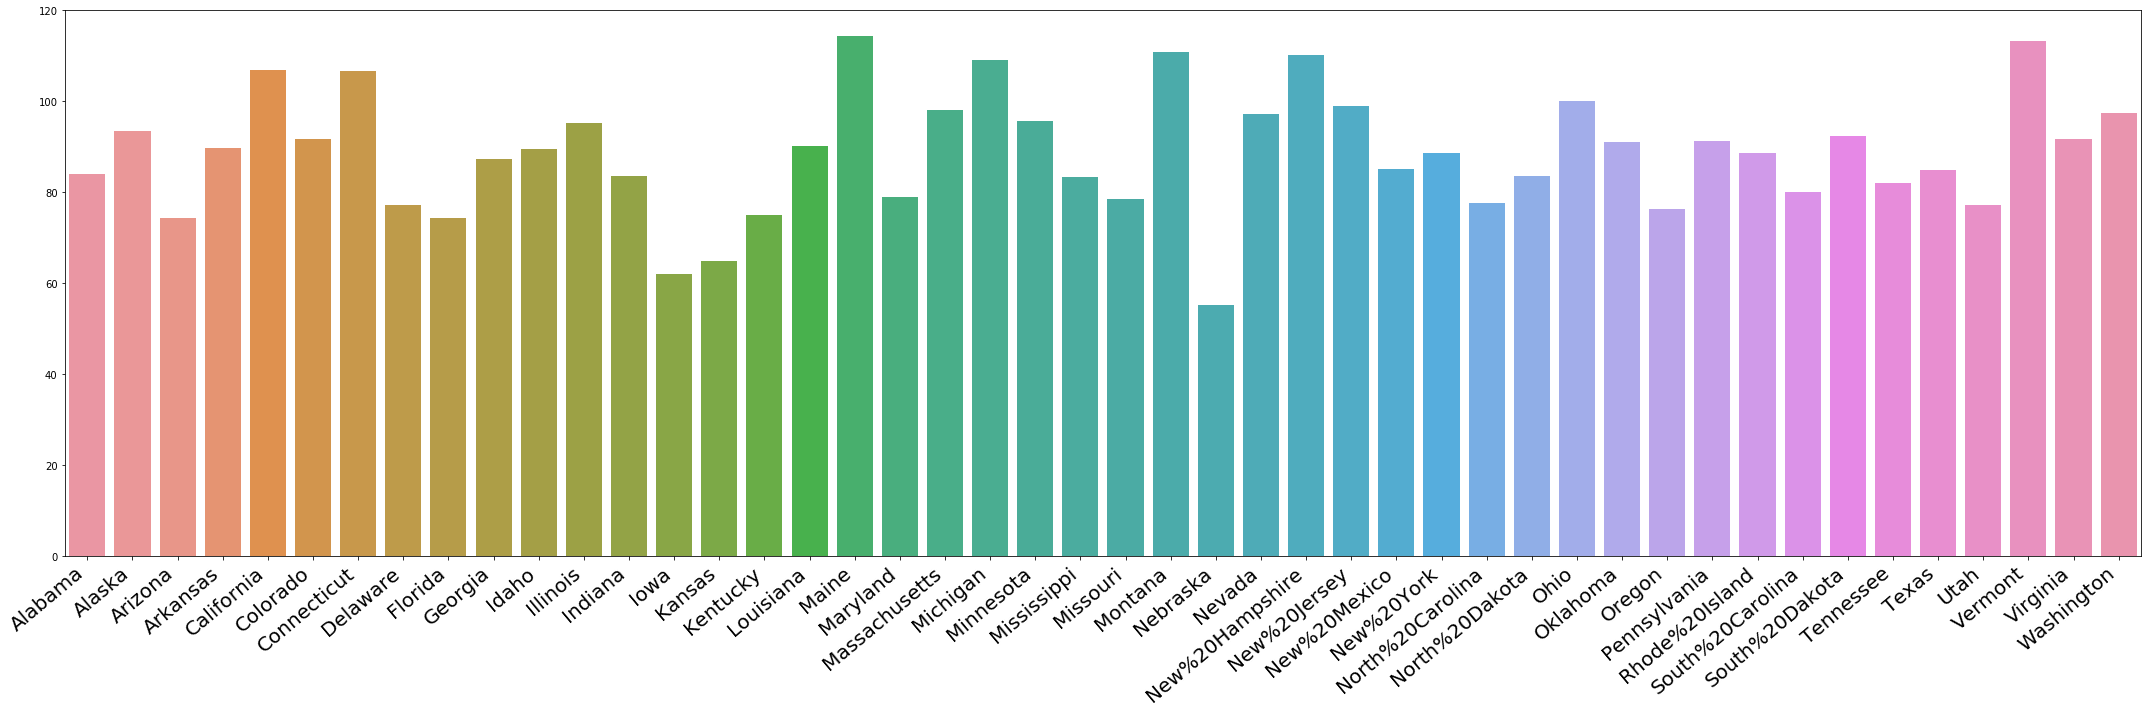

,city,price,lat,long
0,Atlantic City,10.0,39.361183,-74.424599
1,Port Clinton,10.0,41.516320,-82.942440
2,Round Rock,10.0,30.497090,-97.697960
3,Stateline,10.0,38.964153,-119.886620
4,West Fairlee,10.0,43.897550,-72.263980
...,...,...,...,...
2773,Weston,895.0,41.228100,-73.374590
2774,Lyme,950.0,41.433300,-72.335720
2775,Riverwoods,950.0,42.181410,-87.882850
2776,Aberdeen,1495.0,38.681540,-83.775390


c:\users\jpnts\documents\cmsc320\final\envs\lib\site-packages\IPython\core\display.py:701: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


In [7]:
costs = []

for i in lst: 
    mean = i['price'].mean()
    costs.append(mean)
    
len(costs)
len(states)
plt.figure(figsize = (30, 10))
ax = sns.barplot(x = states, y = costs)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right",fontsize=20)
plt.tight_layout()
plt.show()

token = 'pk.eyJ1IjoiamFwbmVldCIsImEiOiJjazQzM25majcwM3diM21uMXk4bnVieWl6In0.Nw00DmDETPkUH7dtCSzC9Q'
query = "SELECT city, price, lat,long FROM data Group By city Order By price"
sub = pandasql.sqldf(query,globals())
display(sub)

df_split = np.array_split(sub, 5)
for i in range(0,5):    
#     points = df_to_geojson(df_split[i], properties=['city', 'count'], lat = 'lat', lon = 'long', precision = 3)
    points = df_to_geojson(df_split[i], 
                           properties=['city', 'price'],
                           lat='lat', lon='long', precision=3)

    # Generate data breaks and color stops from colorBrewer
    color_breaks = [10,50,100,200,300,500,700,1000,1500]
    color_stops = create_color_stops(color_breaks, colors='YlGnBu')

    # Create the viz from the dataframe
    viz = CircleViz(points,
                    access_token=token,
                    height='600px',
                    color_property='price',
                    color_stops=color_stops,
                    radius = 5,
                    center=(-95, 40),
                    zoom=3,
                    below_layer='waterway-label')
    viz.show()

#### Review Distribution

One of the most importnat aspects of choosing an airbnb is the number of reviews. Since we couldn't get the actual reviews from the website we had the count for each city. So we plot a heatmap to see where the reviews were the highest and where the least.
We found out that Bryson city in North Carolina had the least number of reviews where as satellite beach in florida had the highest number of reviews. Which kind of makes sense since florida is one of the most visited destinations in the US.

In [8]:
query = "SELECT city, reviews, lat, long FROM data Group By city"
sub = pandasql.sqldf(query,globals())
display(sub)



# Generate data breaks and color stops from colorBrewer
color_breaks = [0,10,50,100,150,200,250,300,350]

heatmap_color_stops = create_color_stops([0.01,0.25,0.5,0.75,1], colors='RdPu')
heatmap_radius_stops = [[0,1], [15, 40]] #increase radius with zoom

color_stops = create_color_stops(color_breaks, colors='Spectral')

heatmap_weight_stops = create_weight_stops(color_breaks)

df_split = np.array_split(sub, 3)
for i in range(0,3):    
    
    points = df_to_geojson(df_split[i], 
                       properties=['city', 'reviews'],
                       lat='lat', lon='long', precision=3)
    viz = HeatmapViz(points,
                 access_token='pk.eyJ1IjoiamFwbmVldCIsImEiOiJjazQzM25majcwM3diM21uMXk4bnVieWl6In0.Nw00DmDETPkUH7dtCSzC9Q',
                 weight_property='reviews',
                 style = 'mapbox://styles/mapbox/light-v9?optimize=true',
                 weight_stops=heatmap_weight_stops,
                 color_stops=heatmap_color_stops,
                 radius_stops=heatmap_radius_stops,
                 opacity=0.9,
                 center=(-95, 40),
                 zoom=3,
                 below_layer='waterway-label')

    viz.show()

,city,reviews,lat,long
0,Bryson City,114,35.409890,-83.494140
1,North Cape May,201,38.975740,-74.942250
2,Venice Los Angeles,463,33.985400,-118.471210
3,Aberdeen,42,38.681540,-83.775390
4,Abilene,155,38.913630,-97.280300
...,...,...,...,...
2773,east Sandwich,131,41.736000,-70.420900
2774,hilton head,322,32.182370,-80.731110
2775,lake las vegas,249,36.103960,-114.931890
2776,portland,279,43.657280,-70.260660


c:\users\jpnts\documents\cmsc320\final\envs\lib\site-packages\IPython\core\display.py:701: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


## A story of New Jersey

Next we deep dive in one state to do some analysis on certain other factors regarding a travellers Airbnb stay.

### In which city are bnbs located

We first start out by plotting how the airbnbs are scattered across the state. This gives us the perspective which cities are more commonly to get travellers as compared to others.

In [12]:
query = "SELECT city, count(city) as count, lat, long FROM data WHERE state = 'New%20Jersey' Group By city Order By count"
sub = pandasql.sqldf(query,globals())
display(sub)

points = df_to_geojson(sub, 
                       properties=['city', 'count'],
                       lat='lat', lon='long', precision=3)

# Generate data breaks and color stops from colorBrewer
color_breaks = [1,2,3,4,5,10,30,40,45]
color_stops = create_color_stops(color_breaks, colors='YlGnBu')

# Create the viz from the dataframe
viz = CircleViz(points,
                access_token=token,
                height='600px',
                color_property='count',
                color_stops=color_stops,
                label_property='reviews',
                stroke_color='black',
                radius = 5,
                center=(-75, 40),
                zoom=7,
                below_layer='waterway-label')
viz.show()

,city,count,lat,long
0,North Cape May,1,38.975740,-74.942250
1,Atlantic Highlands,1,40.396980,-74.072650
2,Barnegat Township,1,39.762190,-74.192290
3,Bayonne,1,40.647970,-74.138300
4,Beachwood,1,39.940190,-74.185230
...,...,...,...,...
77,Elizabeth,15,40.649910,-74.186620
78,Cape May,18,38.950990,-74.936950
79,Union City,18,40.767370,-74.035360
80,Atlantic City,27,39.361183,-74.424599


c:\users\jpnts\documents\cmsc320\final\envs\lib\site-packages\IPython\core\display.py:701: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


### Which cities in New Jersey have highest reviews

Once we had the cities with airbnbs it was time to see which of those airbnbs had the highest rating so that we could suggest the perfect place to stay in NJ

,city,reviews,count,lat,long
0,North Cape May,201,1,38.975740,-74.942250
1,Andover,102,2,40.970050,-74.636690
2,Asbury Park,188,2,40.222490,-74.017850
3,Atlantic City,33,27,39.361183,-74.424599
4,Atlantic Highlands,127,1,40.396980,-74.072650
...,...,...,...,...,...
77,West Milford,135,1,41.137670,-74.372790
78,West New York,36,6,40.787230,-74.006530
79,West Windsor Township,122,4,40.280766,-74.635460
80,Wildwood,50,8,38.972870,-74.829750


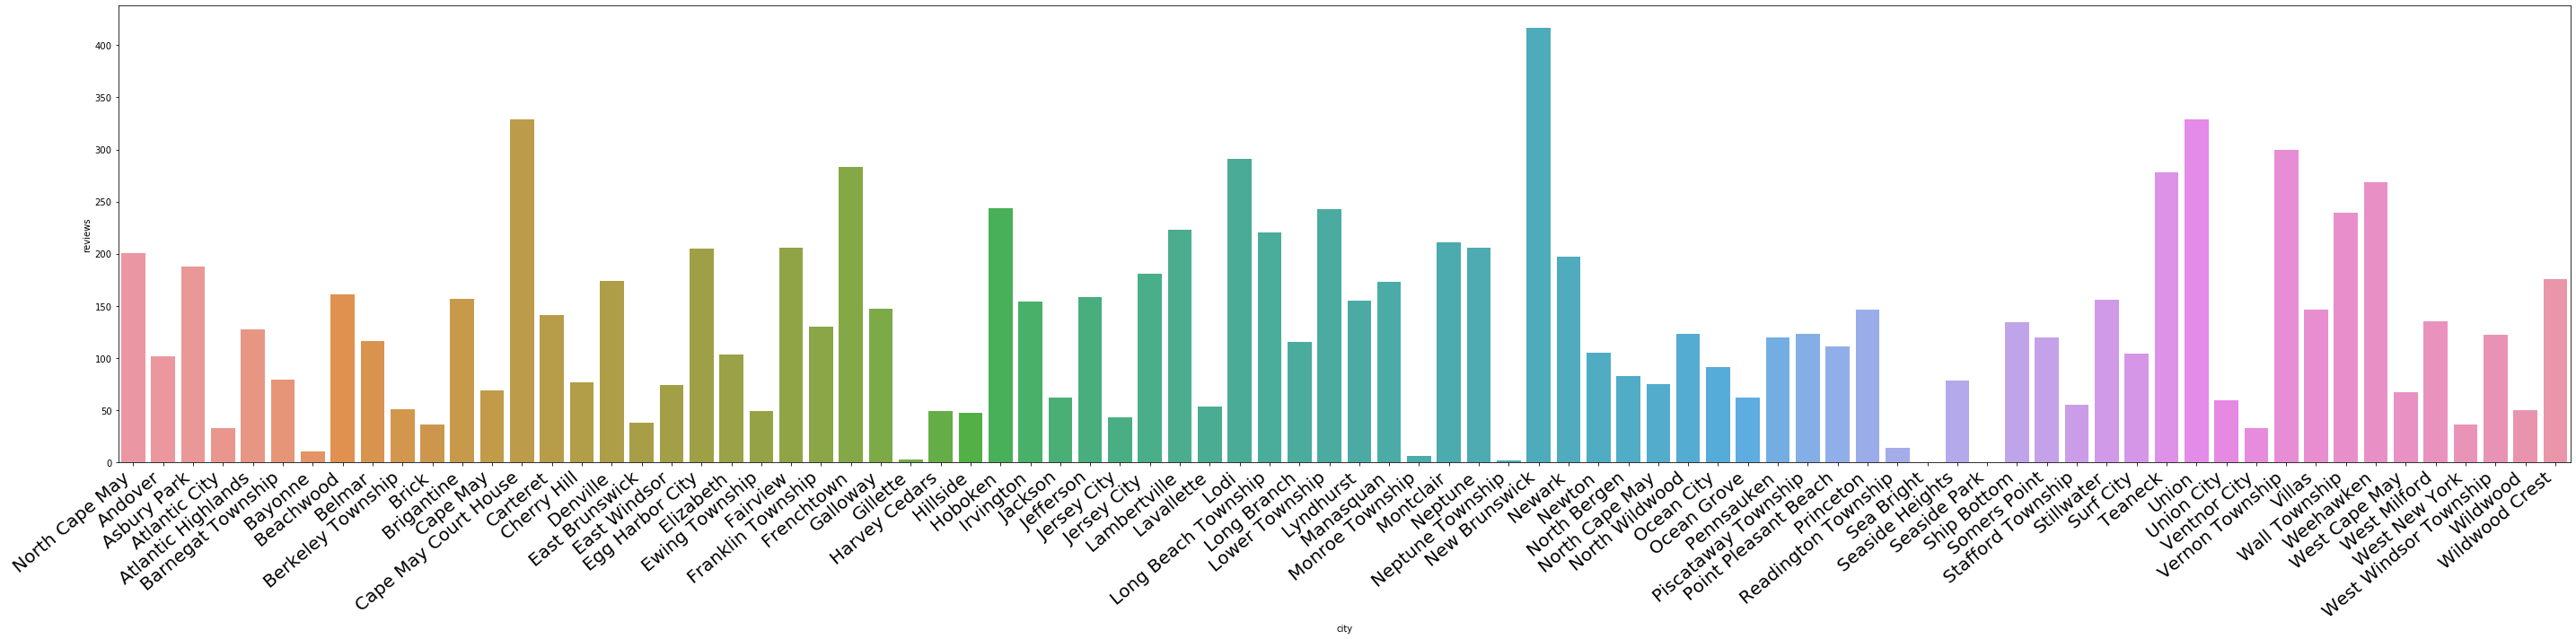

In [13]:
query = "SELECT city, reviews, count(city) as count, lat, long FROM data WHERE state = 'New%20Jersey' Group By city"
sub = pandasql.sqldf(query,globals())
display(sub)


plt.figure(figsize = (40, 10))
ax = sns.barplot(x = sub['city'], y = sub['reviews'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right",fontsize=20)
plt.tight_layout()
plt.show()

Even though New Brunswick has just 5 airbnb's it has the highest number of reviews. This makes New Brunswick a pretty loveable place to stay in. Comparing this to Jersey City which has 56 reported BNB's but only around 300 reviews which is much less when comapred to New Brunswick.

### Desirable cities to Airbnb

Depicts which city have a better ratio of avg_rating and number of bnbs in that city.

Here we expand more on the above stated results. We calculate the ratio of avg_rating and number of bnbs in the city to see where a traveller would love to stay. We thought anything below a 4 would be unstatisfactory.

,city,count,rating,lat,long,ratio
0,Neptune Township,1,NaN,40.210010,-74.006040,NaN
1,Sea Bright,2,4.810000,40.360660,-73.975110,NaN
2,Seaside Park,2,4.970000,39.907390,-74.086630,NaN
3,Jersey City,56,4.771429,40.728600,-74.057210,0.088929
4,Atlantic City,27,4.814074,39.361183,-74.424599,0.181852
...,...,...,...,...,...,...
77,Frenchtown,1,4.960000,40.534470,-75.009940,4.960000
78,Vernon Township,1,4.960000,41.191480,-74.507180,4.960000
79,East Windsor,1,4.970000,40.234090,-74.527370,4.970000
80,Somers Point,1,4.970000,39.318700,-74.616670,4.970000


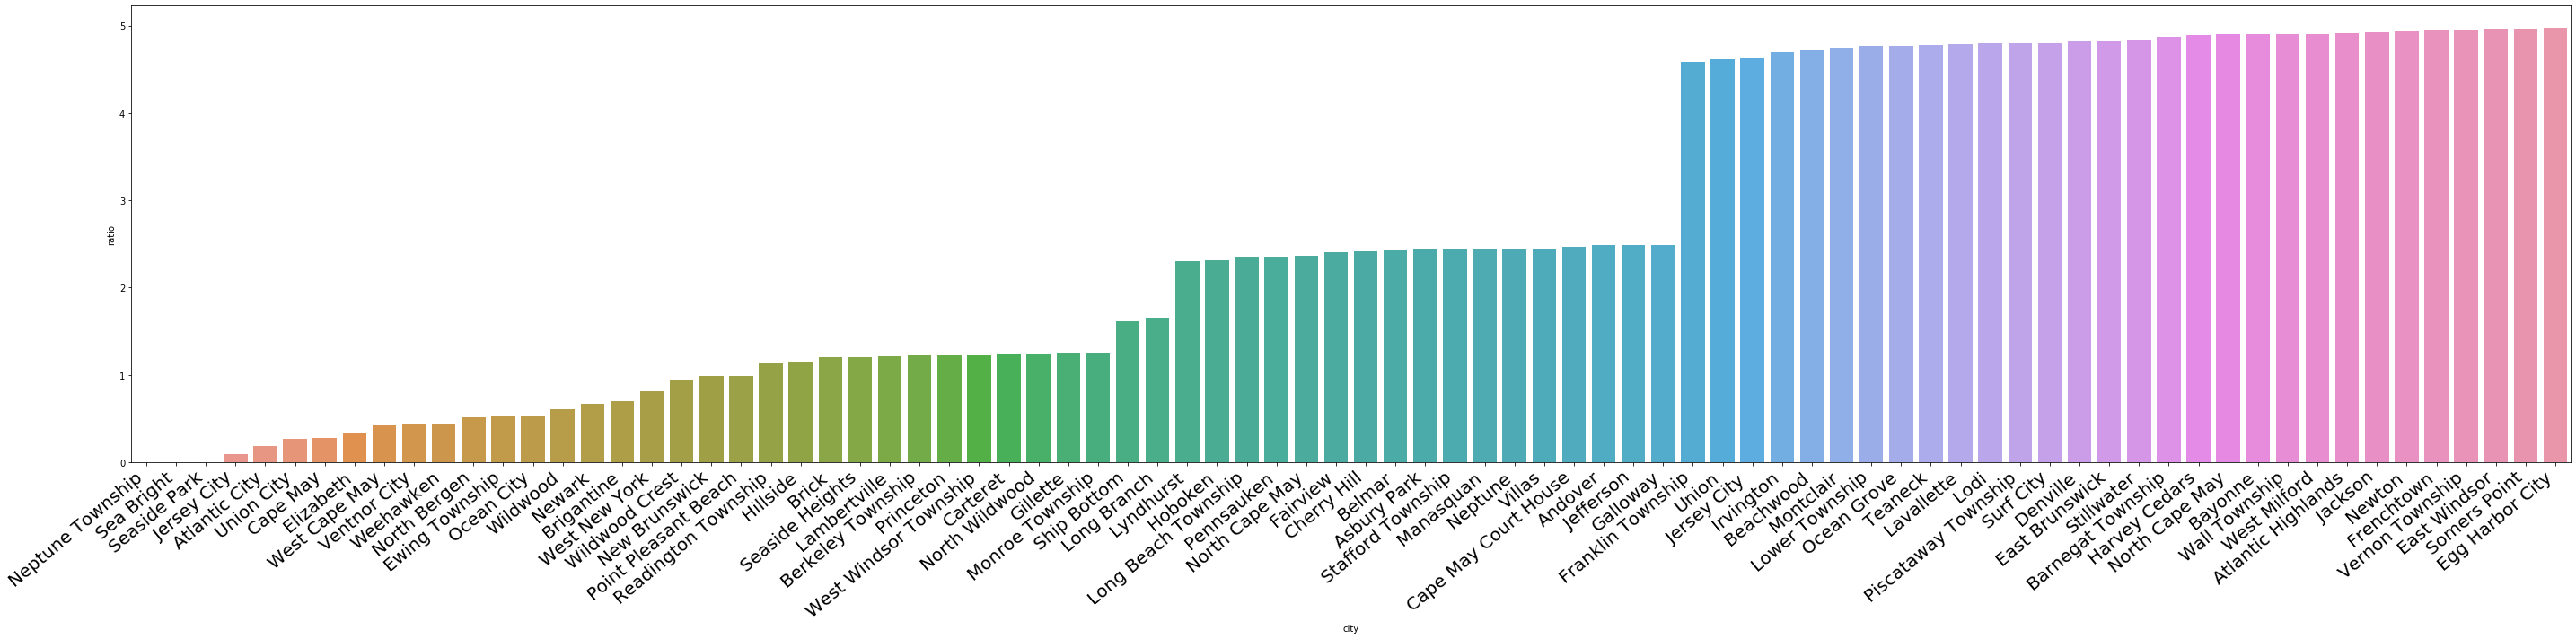

In [14]:
query = "SELECT city, count(city) as count, avg(avg_rating) as rating ,lat, long, (avg_rating/count(city)) as ratio FROM data WHERE state = 'New%20Jersey' Group By city Order By ratio"
sub = pandasql.sqldf(query,globals())
display(sub)

plt.figure(figsize = (40, 10))
ax = sns.barplot(x = sub['city'], y = sub['ratio'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right",fontsize=20)
plt.tight_layout()
plt.show()

#### We now plot the places where the ratio is less than 4, making it undesirable to live. 
Cities like cherry hill racked up the number one spot. On researching more on our results we got to know that cherry hill infact has the highest crime rate in NJ. Well you would want to stear clear of those regions then!!

In [16]:
query = "SELECT city, count(city) as count, avg(avg_rating) as rating ,lat, long, (avg_rating/count(city)) as ratio FROM data WHERE state = 'New%20Jersey' Group By city Order By ratio"
sub = pandasql.sqldf(query,globals())
query = "SELECT city, ratio, lat, long FROM sub where ratio < 4"
sub = pandasql.sqldf(query,globals())
display(sub)

points = df_to_geojson(sub, 
                       properties=['city', 'ratio'],
                       lat='lat', lon='long', precision=3)

# Generate data breaks and color stops from colorBrewer
color_breaks = [0,0.5,1,1.5,2,2.5]
color_stops = create_color_stops(color_breaks, colors='YlGnBu')

# Create the viz from the dataframe
viz = CircleViz(points,
                access_token=token,
                height='600px',
                color_property='ratio',
                color_stops=color_stops,
                label_property='reviews',
                radius = 5,
                center=(-75, 41),
                zoom=7,
                below_layer='waterway-label')
viz.show()

,city,ratio,lat,long
0,Jersey City,0.088929,40.728600,-74.057210
1,Atlantic City,0.181852,39.361183,-74.424599
2,Union City,0.267222,40.767370,-74.035360
3,Cape May,0.276111,38.950990,-74.936950
4,Elizabeth,0.328667,40.649910,-74.186620
5,West Cape May,0.433636,38.942550,-74.945290
6,Ventnor City,0.438182,39.344050,-74.466100
7,Weehawken,0.440000,40.767430,-74.029980
8,North Bergen,0.518889,40.788160,-74.028090
9,Ewing Township,0.533333,40.240260,-74.773810


c:\users\jpnts\documents\cmsc320\final\envs\lib\site-packages\IPython\core\display.py:701: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


### Superhosts in US

Superhosts are hosts with very high ratings and treat their customers the best and have been regarded as the best host by Airbnb. This factor is very important when choosing an Airbnb, because you dont want to get stuck with one those snobby and rude hosts!!

,host_true,host_false
0,12894,3567


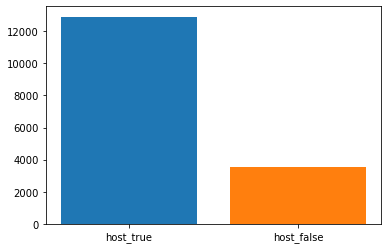

In [17]:
query = "SELECT count(CASE WHEN super_host THEN 1 END) as host_true, count(CASE WHEN not super_host THEN 1 END) as host_false FROM data"
sub = pandasql.sqldf(query,globals())
l = sub.values.tolist()
display(sub)
plt.bar('host_true',sub['host_true'])
plt.bar('host_false', sub['host_false'])
plt.show()

Here we see that based on our sample about 40% of the hosts are superhosts.

## Number of super hosts in New Jersey


,city,host_true,host_false,lat,long
0,Franklin Township,0,1,40.443170,-74.561770
1,Harvey Cedars,0,1,39.698240,-74.139130
2,Hillside,0,4,40.699200,-74.248350
3,Hoboken,0,2,40.746410,-74.026980
4,Jersey City,0,1,40.750900,-74.052400
...,...,...,...,...,...
77,West Cape May,10,1,38.942550,-74.945290
78,Union City,13,5,40.767370,-74.035360
79,Cape May,15,3,38.950990,-74.936950
80,Atlantic City,16,11,39.361183,-74.424599


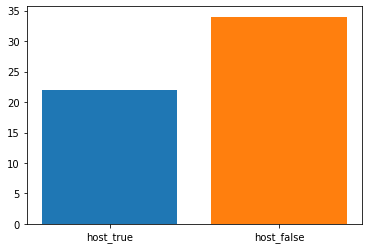

c:\users\jpnts\documents\cmsc320\final\envs\lib\site-packages\IPython\core\display.py:701: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


In [19]:
query = "SELECT city, count(CASE WHEN super_host THEN 1 END) as host_true, count(CASE WHEN not super_host THEN 1 END) as host_false, lat, long FROM data WHERE state = 'New%20Jersey' Group By city Order By host_true"
sub = pandasql.sqldf(query,globals())
l = sub.values.tolist()
display(sub)

plt.bar('host_true',sub['host_true'])
plt.bar('host_false', sub['host_false'])
plt.show()


points = df_to_geojson(sub, 
                       properties=['city', 'host_true'],
                       lat='lat', lon='long', precision=3)

# Generate data breaks and color stops from colorBrewer
color_breaks = [0,5,10,15,20]
color_stops = create_color_stops(color_breaks, colors='YlGnBu')

# Create the viz from the dataframe
viz = CircleViz(points,
                access_token=token,
                height='600px',
                color_property='host_true',
                color_stops=color_stops,
                label_property='reviews',
                radius = 5,
                center=(-75, 41),
                zoom=7,
                below_layer='waterway-label')
viz.show()

The above result was suprising as we see a huge decline in the number of superhosts when we compare it to the result we got for the US. This means most of the hosts in NJ are unverified. Again we see that New Brunswick had all 5 hosts as superhosts which again makes sense based on our analysis of revoew in the previous cells.

### Shows cities with bnbs and their max capacities

We wanted to how cities in NJ stack up when it comes to max occupancy, because sometimes you are travelling with your family and you need a bigger place to stay! And if thats the case then *East Brunswick* is your pick.

,city,count,rating,lat,long,person_cap
0,North Cape May,1,4.900000,38.975740,-74.942250,2
1,Andover,2,4.965000,40.970050,-74.636690,9
2,Asbury Park,2,4.910000,40.222490,-74.017850,4
3,Atlantic City,27,4.814074,39.361183,-74.424599,4
4,Atlantic Highlands,1,4.910000,40.396980,-74.072650,2
...,...,...,...,...,...,...
77,West Milford,1,4.900000,41.137670,-74.372790,6
78,West New York,6,4.756667,40.787230,-74.006530,2
79,West Windsor Township,4,4.920000,40.280766,-74.635460,4
80,Wildwood,8,4.807500,38.972870,-74.829750,3


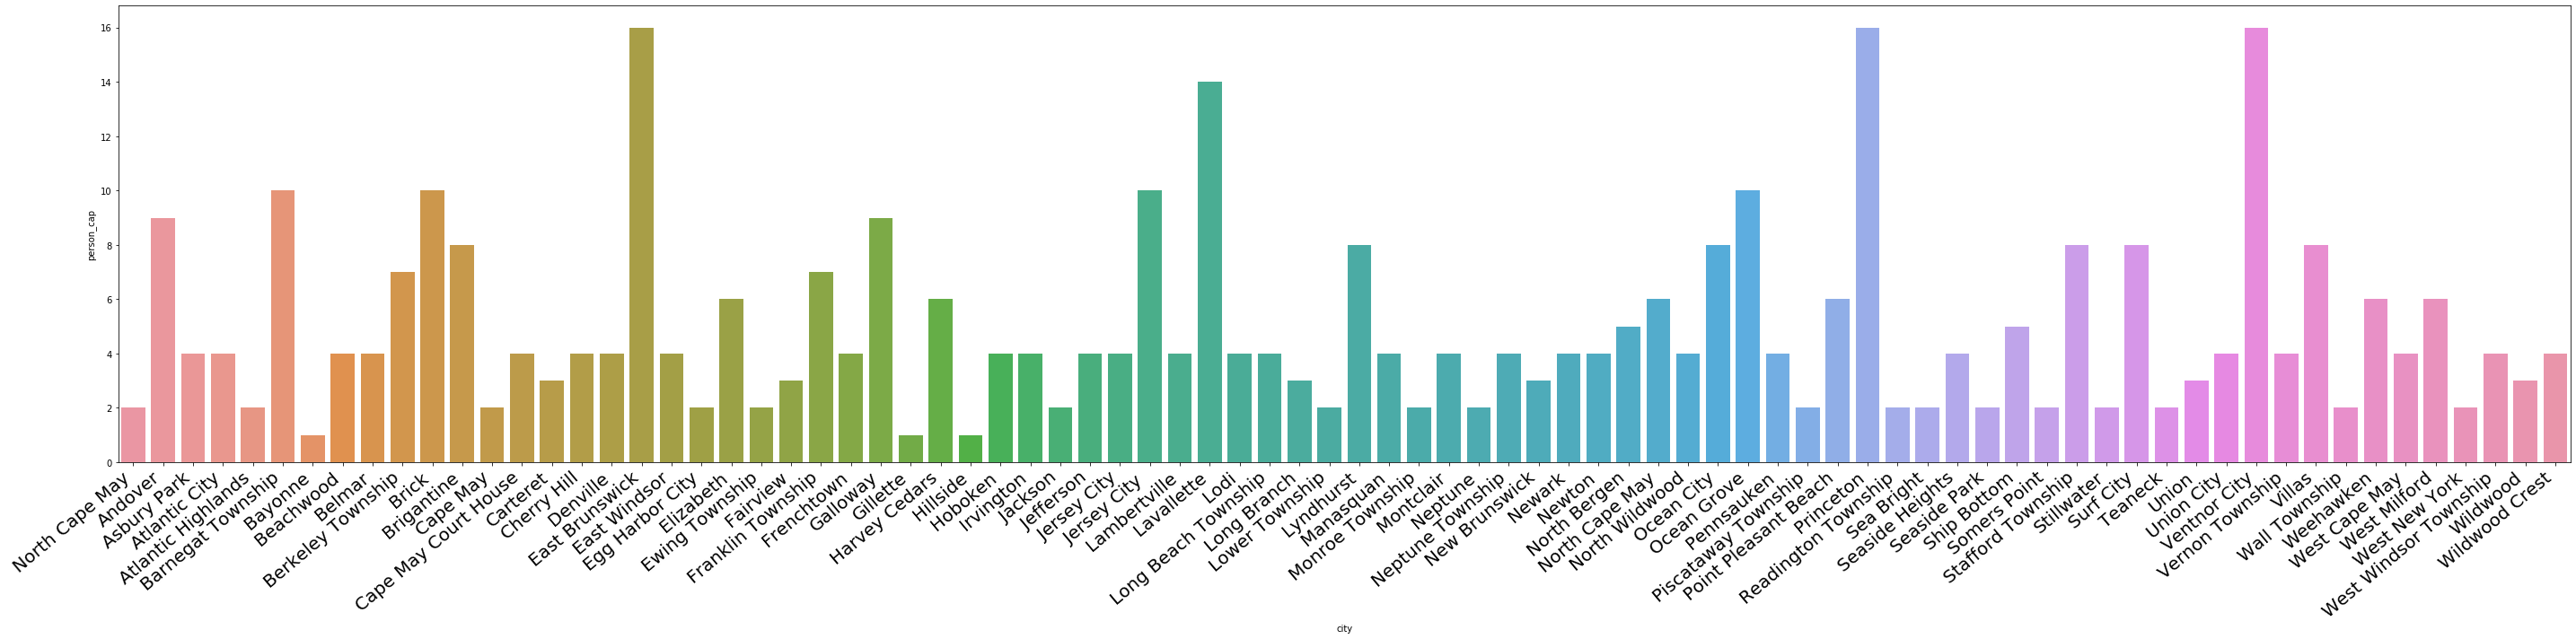

In [20]:
query = "SELECT city, count(person_cap) as count, avg(avg_rating) as rating ,lat, long, person_cap FROM data WHERE state = 'New%20Jersey' Group By city"
sub = pandasql.sqldf(query,globals())
display(sub)

plt.figure(figsize = (40, 10))
ax = sns.barplot(x = sub['city'], y = sub['person_cap'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right",fontsize=20)
plt.tight_layout()
plt.show()

### Shows what kind of rooms are available in New Jersey

,count,lat,long,prop_type
0,1,41.058050,-74.865160,Barn
1,1,40.063080,-74.132360,Boat
2,97,40.728600,-74.057210,Entire apartment
3,3,38.951160,-74.909378,Entire bungalow
4,4,41.025240,-74.728620,Entire cabin
5,26,40.360660,-73.975110,Entire condominium
6,11,40.280766,-74.635460,Entire cottage
7,24,38.950990,-74.936950,Entire guest suite
8,11,38.942550,-74.945290,Entire guesthouse
9,78,40.788160,-74.028090,Entire house


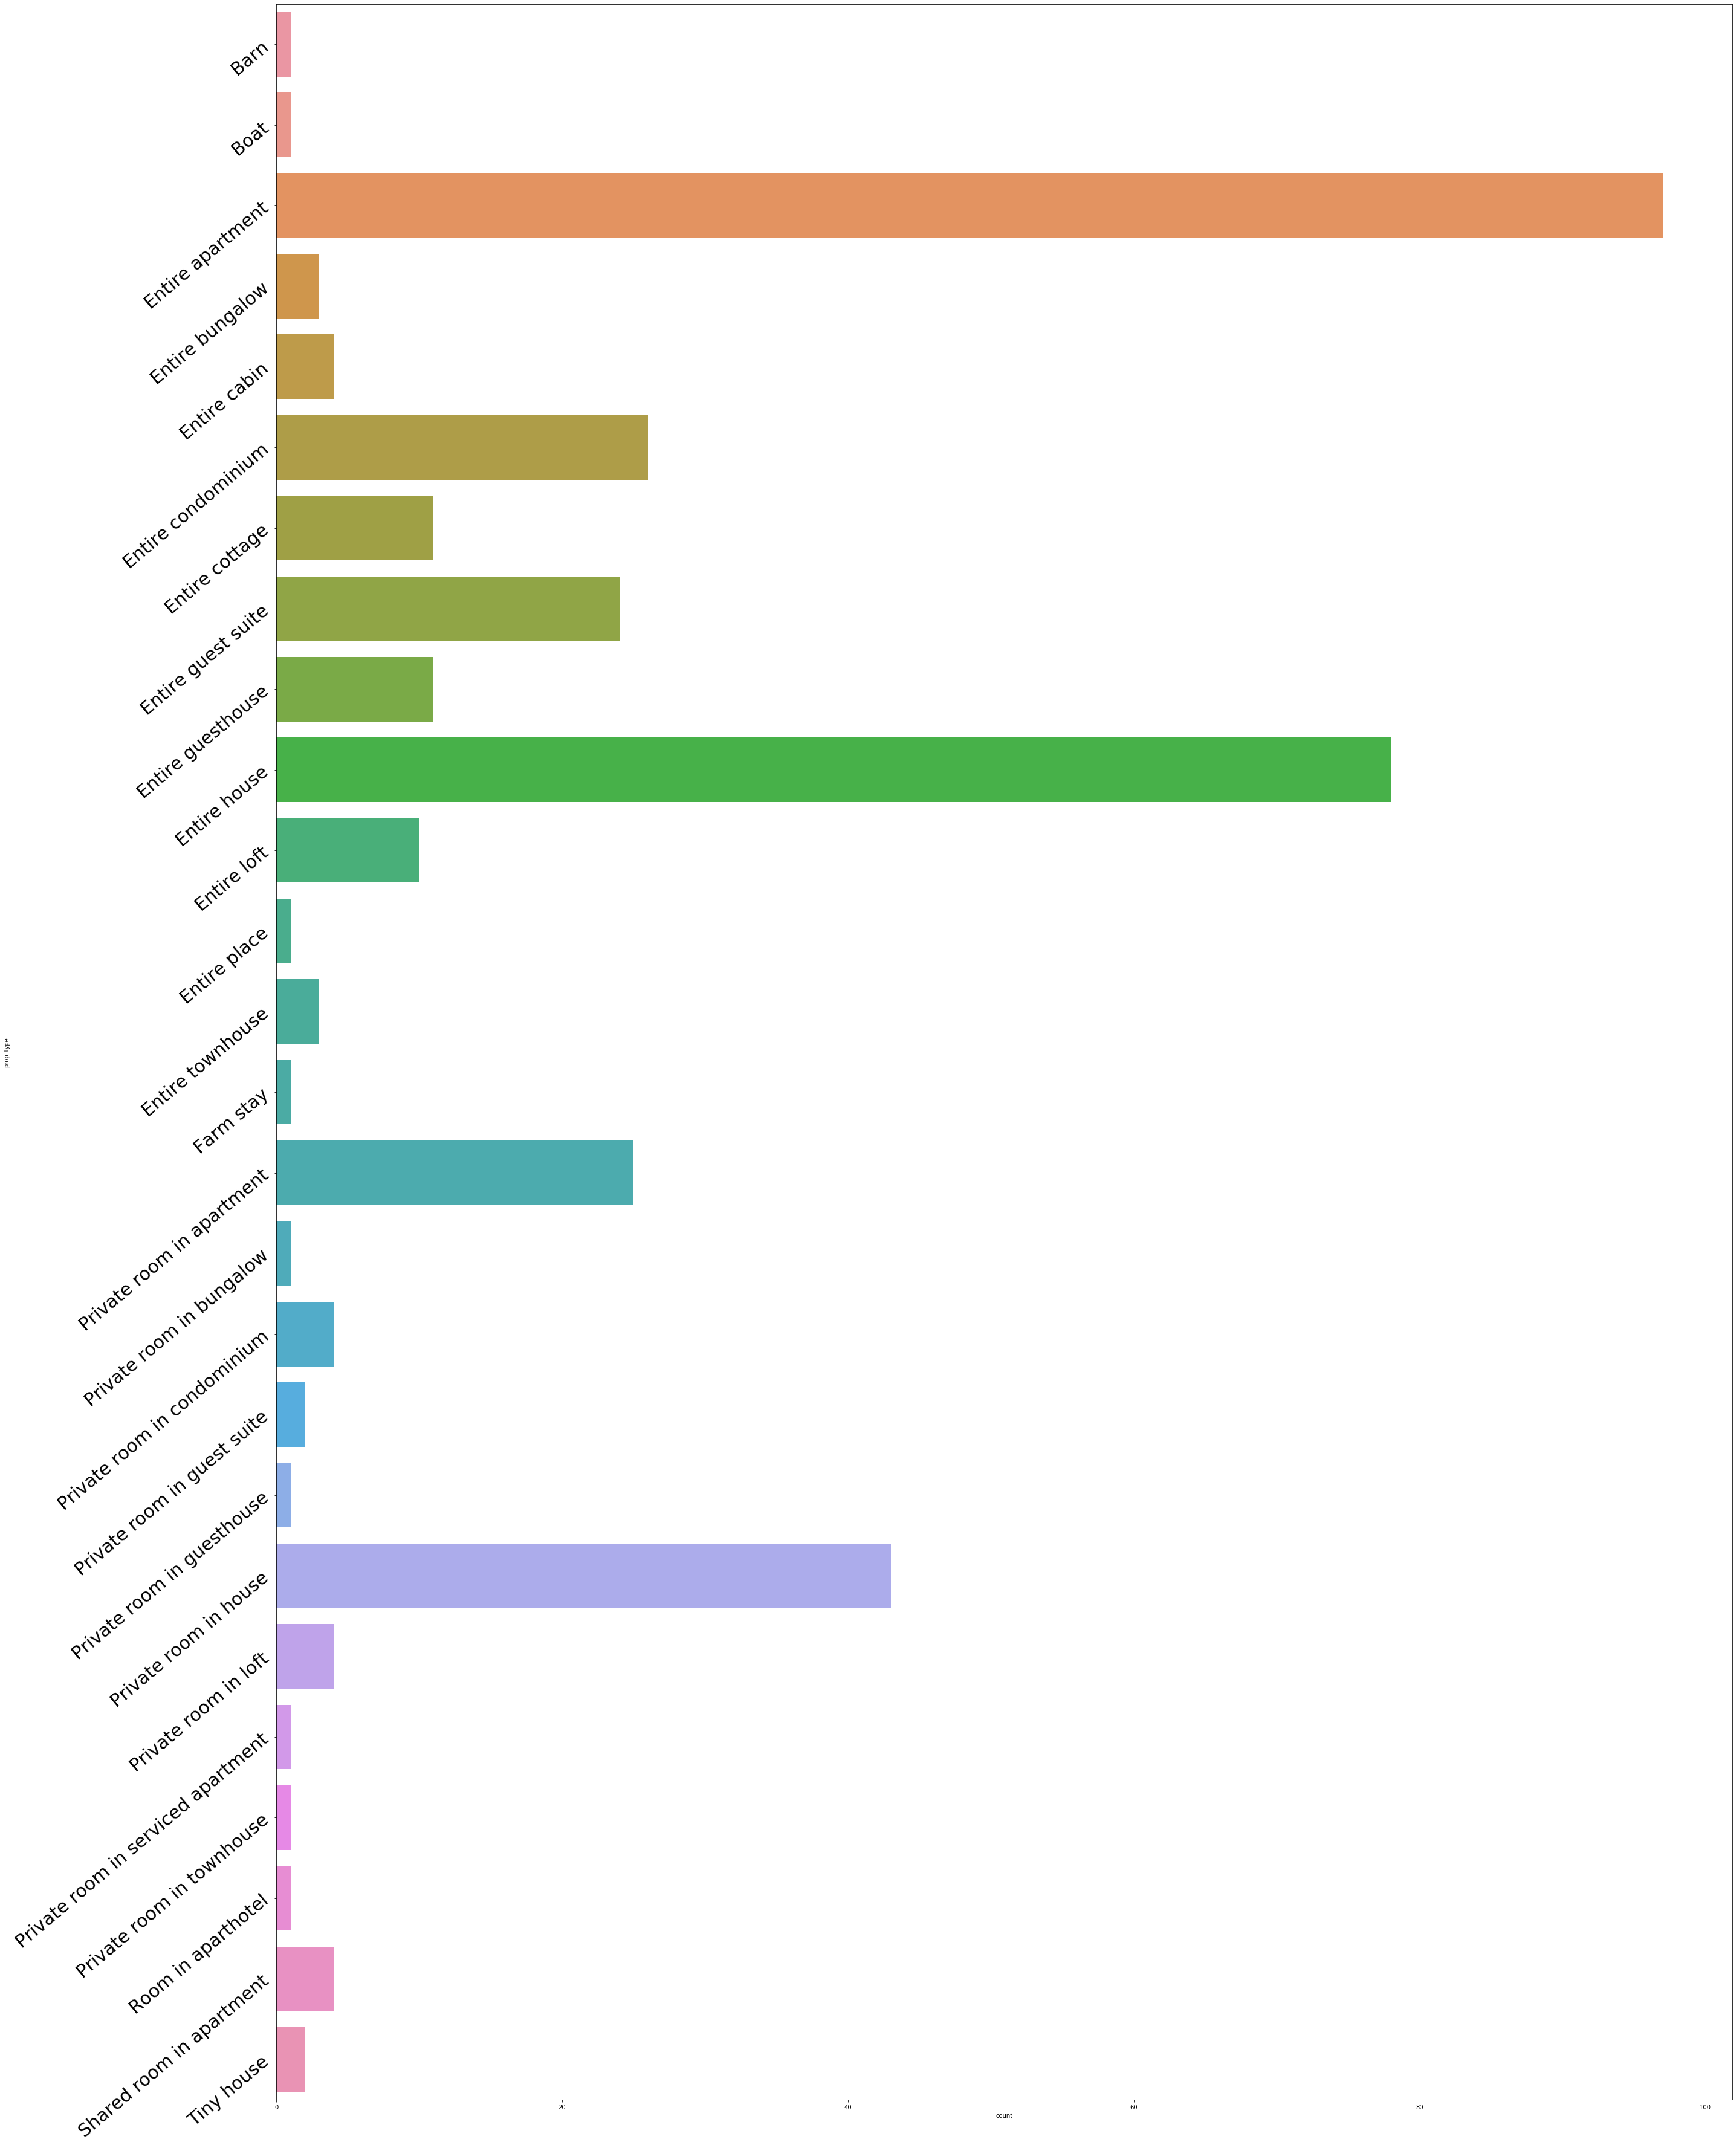

In [21]:
query = "SELECT count(prop_type) as count, lat,long, prop_type  FROM data WHERE state = 'New%20Jersey' Group By prop_type"
sub = pandasql.sqldf(query,globals())
display(sub)

plt.figure(figsize = (40, 50))
ax = sns.barplot(y = sub['prop_type'], x = sub['count'])
ax.set_yticklabels(ax.get_yticklabels(), rotation=40, ha="right",fontsize=30)
plt.tight_layout()
plt.show()

### Price distribution of bnbs in NJ

Finally the important part, how is price distributed in New Jersey.

In [22]:
query = "SELECT city, price, lat,long FROM data WHERE state = 'New%20Jersey' Group By city Order By price"
sub = pandasql.sqldf(query,globals())
display(sub)

points = df_to_geojson(sub, 
                       properties=['city', 'price'],
                       lat='lat', lon='long', precision=3)

# Generate data breaks and color stops from colorBrewer
color_breaks = [10,50,100,200,300,400,500,600,800]
color_stops = create_color_stops(color_breaks, colors='YlGnBu')

# Create the viz from the dataframe
viz = CircleViz(points,
                access_token=token,
                height='600px',
                color_property='price',
                color_stops=color_stops,
                radius = 5,
                center=(-75, 40.2),
                zoom=7,
                below_layer='waterway-label')
viz.show()

,city,price,lat,long
0,Atlantic City,10.0,39.361183,-74.424599
1,Ewing Township,25.0,40.240260,-74.773810
2,Bayonne,28.0,40.647970,-74.138300
3,Egg Harbor City,29.0,39.534230,-74.644600
4,Beachwood,30.0,39.940190,-74.185230
...,...,...,...,...
77,Princeton,299.0,40.363560,-74.664040
78,East Brunswick,353.0,40.424590,-74.475490
79,Stafford Township,400.0,39.669130,-74.225480
80,Ventnor City,572.0,39.344050,-74.466100


c:\users\jpnts\documents\cmsc320\final\envs\lib\site-packages\IPython\core\display.py:701: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


From above we infer that areas around Atlantic city are really expensive, which makes sense because of the night life and all the casinos.

## Machine Learning 

We continue analyzing the state of New Jersey. We first convert the series type of series like price, bedrooms etc. from object to float so that we can use it with sklearn and Linear Regression. We then also check if there are any nan or infinite numbers in the jersey dataframe. Seeing that there are some, we just drop the columns with nan as there are only 3 of them and we are still left with a sample size of 357.


In [30]:
import warnings
warnings.filterwarnings('ignore')


jersey = dictionary['New%20Jersey']

jersey['price']       = jersey['price'].astype(np.int64)
jersey['bedrooms']    = jersey['bedrooms'].astype(np.float64)
jersey['reviews']     = jersey['reviews'].astype(np.float64)
jersey['bathrooms']   = jersey['bathrooms'].astype(np.float64)
jersey['person_cap']  = jersey['person_cap'].astype(np.float64)

#  print(jersey.dtypes)
print(np.any(np.isnan(jersey['price']))) # Should be False
print(np.any(np.isfinite(jersey['price']))) # Should be True
print(np.any(np.isnan(jersey['avg_rating'])))
print(np.any(np.isfinite(jersey['avg_rating'])))


print(len(jersey))
jersey.dropna(how='any', inplace=True)
print(len(jersey))
jersey.reset_index(drop=True)

False
True
True
True
360
357


,state,room_id,name,city,person_cap,bedrooms,bathrooms,reviews,prop_type,guests,star,avg_rating,min_nights,max_nights,price,lat,long,price_factor,super_host
0,New%20Jersey,1583556,Exposed Brick Brownstone Apt!,Jersey City,2.0,1.0,1.0,179.0,Entire apartment,2 guests,5.0,4.79,2,1125,89,40.720960,-74.073830,0.95,True
1,New%20Jersey,12798739,Good Deal! Cozy room Near NYC/EWR,Elizabeth,2.0,2.0,2.0,472.0,Private room in house,2 guests,4.5,4.63,1,1125,29,40.678509,-74.200249,0.95,False
2,New%20Jersey,20573006,"Cute Quirky Garden apt, NYC adjacent",Jersey City,4.0,2.0,1.0,149.0,Entire apartment,4 guests,5.0,4.80,1,90,68,40.714650,-74.075300,0.85,False
3,New%20Jersey,565677,LARGE SUNNY ROOM 15 MIN to NYC !,Jersey City,2.0,1.0,1.0,339.0,Private room in apartment,2 guests,5.0,4.83,2,30,49,40.721370,-74.046420,1.00,True
4,New%20Jersey,31567374,Classic Brownstone Apt in a Historic Neighborhood,Jersey City,2.0,1.0,1.0,47.0,Entire apartment,2 guests,5.0,4.98,2,1125,89,40.721610,-74.073920,0.90,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,New%20Jersey,31302280,169 Greenland Ranch,Ewing Township,2.0,1.0,1.0,49.0,Private room in house,2 guests,5.0,4.80,1,31,25,40.240260,-74.773810,0.90,False
353,New%20Jersey,38937625,Private Bed + Private Bath in Beautiful Monroe,Monroe Township,2.0,1.0,1.0,6.0,Private room in loft,2 guests,5.0,5.00,1,180,42,40.316360,-74.452670,0.95,False
354,New%20Jersey,19701482,Convenience! - Fantastic Jersey City Private Apt,Jersey City,4.0,2.0,1.0,43.0,Entire apartment,4 guests,5.0,4.98,6,1000,145,40.728600,-74.057210,0.95,False
355,New%20Jersey,27870508,Private Room on the Beach,Wildwood,3.0,2.0,1.0,50.0,Private room in condominium,3 guests,5.0,4.84,1,1125,60,38.972870,-74.829750,1.00,True


For the purpose of the analysis we are only considering numerical features as we aim to see what aspect outside of the location of Airbnb influences it's cost

The features (independent variables) we consider are the following
<ol> 
<li>person_cap - number of guests that can stay in the Airbnb</li>
<li>bedrooms - number of available bedrooms</li>
<li>bathrooms - number of available bathrooms</li>
<li>reviews - how many reviews does it have</li>
<li>avg_rating - what is the rating of the airbnb</li>
<li>min_nights - minimum number of nights that a guest needs to stay</li>
<li>max_nights - maximum number of nights that a guest can stay</li>
</ol>

The target (dependent variable) we wish to conclude from the the rest the price .

In [31]:
features = jersey.loc[:, ['person_cap','bedrooms','bathrooms','reviews','avg_rating','min_nights','max_nights']]
target   = jersey['price']

### Multiple Linear Regression 

Define X and y for use in scikit-learn's LinearRegression() function. Fit the model.


In [32]:
X = features
y = target
lm = LinearRegression()
model = lm.fit(X,y)
lm.score(X,y)

0.5956251290759291

We get a score of 0.5956 or approximately 60%, meaning that we can explain about 60% or a little more that half the variance in  our model. 

In [33]:
sk_coeffs = lm.coef_.tolist()
for attr, coef in zip(features, sk_coeffs):
    print("Attribute: {}, Coefficient: {}".format(attr,coef))


Attribute: person_cap, Coefficient: 2.2134735110256094
Attribute: bedrooms, Coefficient: 1.3391352986856868
Attribute: bathrooms, Coefficient: 67.40845787730709
Attribute: reviews, Coefficient: -0.06094148525799303
Attribute: avg_rating, Coefficient: 95.7337055879433
Attribute: min_nights, Coefficient: 0.3399589854692048
Attribute: max_nights, Coefficient: -0.00029185314933877216


From the above we see that the most influencing attributes appear to be avg. rating, number of bathrooms available followed by person_cap or the number of guests that are allowed. Suprisingly, the duration of stay (min and max nights) and reviews appears to have a small or even negative coefficient values. 

To further see, which attributes have a meanigful impact we need to observe their p-values

###  P-value with statsmodels


We use the features and target previously created in the statsmodel api. Folowing the addition of constant we use the method of Ordinary Least Squares (OLS) to estimate our parameters and how do they hold up. 

Our Null Hypothesis is that none of the attributes have a noticable impact on the the price of airbnb

In [34]:
sm_y = y
sm_X = X

sm_X = sm.add_constant(X)

OLS_model = sm.OLS(y,X).fit()
OLS_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.809
Model:                            OLS   Adj. R-squared (uncentered):              0.805
Method:                 Least Squares   F-statistic:                              211.8
Date:                Sun, 15 Dec 2019   Prob (F-statistic):                   1.14e-121
Time:                        13:03:30   Log-Likelihood:                         -1960.6
No. Observations:                 357   AIC:                                      3935.
Df Residuals:                     350   BIC:                                      3962.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
person_cap     2.2176      1.926      1.151      0.250      -1.571       6.006
bedrooms       1.8375      2.778      0.662      0.509      -3.625       7.300
bathrooms     67.3166      5.611     11.997      0.000      56.281      78.352
reviews       -0.0670      0.034     -1.988      0.048      -0.133      -0.001
avg_rating     0.3645      1.981      0.184      0.854      -3.533       4.261
min_nights     1.0420      1.505      0.692      0.489      -1.917       4.001
max_nights    -0.0035      0.006     -0.583      0.560      -0.016       0.008
==============================================================================
Omnibus:                      234.769   Durbin-Watson:                   1.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4447.720
Skew:                           2.409   Prob(JB):                         0.00
Kurtosis:                      19.607   Cond. No.                     1.51e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

According to the coefficients ('coef') column, it is clear that the number of bathrooms has by far the most impact on the price of the Airbnb. Other attributes with significant impact on price are number of guests allowed (person_cap), number of bedrooms, minimum duration of stay and the ones with least impact are maximum duration of stay, reviews and average rating. While most of this is the same as the outpout from the Linear Regression model, we observe that 2 attributes average rating and minimum nights seems to have changed


The p-values above ('P>|t|') we can see that at the significance level of alpha = 0.05, each attribute has a higher p-value than 0.05 except the number of bathrooms and number of reviews.

Hence, we can conclude that the attributes affecting the price mainly are the number of revies and number of bathrooms.

Another thing to note is our R-Squared value, of 0.809 which is higher value than the one obtained from our Linear Regression model.

We once again make a new Linear Regression model with just Number of Bathrooms and average rating.



### Updated Model with Key Features

In [38]:
features = jersey.loc[:, ['bathrooms','avg_rating']]
target   = jersey['price']
X = features
y = target
lm = LinearRegression()
model = lm.fit(X,y)
lm.score(X,y)

0.5827801129634287

Since, we get an extremely similar score, we can safely conclude that the 2 factors influencing the price of Airbnb, outside of it's location are the number of bathrooms and the average rating of the Airbnb. One of which is defiently a suprise 

## Conclusion 

